In [5]:
%%capture
from kls import bdh, bdh_bulk, get_kls_series
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import datetime
from bbg.sapi import BbgSapi
sapi = BbgSapi()
from collections import defaultdict

## FOREIGN EXCHANGE ## 

In [6]:
df = bdh_bulk({'mxn':'USDCZK Curncy', 'php': 'PPN+1M Curncy'}, '19900101','20250101')

df.fillna(method='ffill', inplace=True)

In [7]:
first = 'mxn'
second = 'php'

df_dod = ((df / df.shift(5)-1)*100).round(2)

df_dod[first+'_std'] = df_dod[first].rolling(20).std().round(2)
df_dod[second+'_std'] = df_dod[second].rolling(20).std().round(2)

df_dod['ratio'] = (df_dod[first+'_std'] / df_dod[second+'_std']).round(2)

df_dod['ratio'] = df_dod.ratio.rolling(20).mean().round(2)

df_dod.tail()

,mxn,php,mxn_std,php_std,ratio
asofdate,,,,,
2021-03-11,-0.39,-0.33,0.97,0.66,1.93
2021-03-12,-0.85,-0.18,0.98,0.66,1.82
2021-03-15,-1.52,-0.33,1.06,0.66,1.73
2021-03-16,-0.26,0.29,1.09,0.66,1.67
2021-03-17,-0.91,0.33,1.15,0.65,1.64


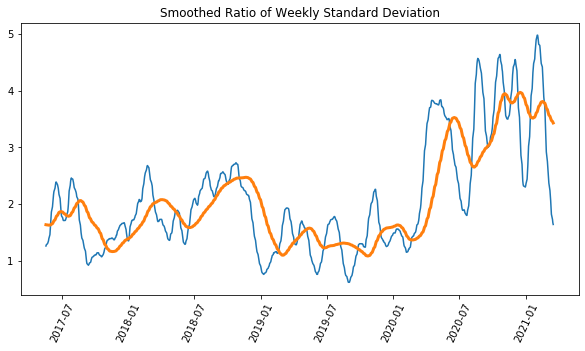

In [8]:
ax, figure = plt.subplots(figsize = (10,5))

plt.plot(df_dod.ratio.tail(1000));
plt.plot(df_dod.ratio.rolling(60).mean().tail(1000), linewidth = 3)

plt.xticks(rotation = 65);

plt.title('Smoothed Ratio of Weekly Standard Deviation');

In [9]:
## INTEREST RATES ##

In [10]:
df = bdh_bulk({'zar':'SAFS0101 Curncy', 'myr': 'IRSWNI5 Curncy'}, '19900101','20250101')

df.fillna(method='ffill', inplace=True)

In [11]:
first = 'zar'
second = 'myr'

df_dod = (df - df.shift(5)).round(2)

df_dod[first+'_std'] = df_dod[first].rolling(8).std().round(2)
df_dod[second+'_std'] = df_dod[second].rolling(8).std().round(2)

df_dod['ratio'] = (df_dod[first+'_std'] / df_dod[second+'_std']).round(2)

df_dod['ratio'] = df_dod.ratio.rolling(20).mean().round(2)

df_dod.tail()

,myr,zar,zar_std,myr_std,ratio
asofdate,,,,,
2021-03-11,0.02,0.16,0.13,0.05,2.06
2021-03-12,-0.05,-0.05,0.16,0.06,2.14
2021-03-15,-0.14,-0.33,0.24,0.09,2.23
2021-03-16,-0.14,-0.35,0.29,0.10,2.34
2021-03-17,-0.07,-0.18,0.30,0.10,2.43


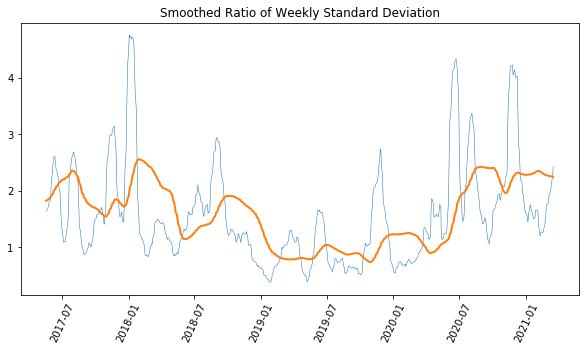

In [12]:
ax, figure = plt.subplots(figsize = (10,5))

plt.plot(df_dod.ratio.tail(1000), linewidth = 0.5);
plt.plot(df_dod.ratio.rolling(90).mean().tail(1000), linewidth = 2)

plt.xticks(rotation = 65);

plt.title('Smoothed Ratio of Weekly Standard Deviation');